In [1]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('Data/samples_1.csv')
df.head()

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_2991,sample_2992,sample_2993,sample_2994,sample_2995,sample_2996,sample_2997,sample_2998,sample_2999,words
0,129,206,227,208,275,402,474,559,658,880,...,-6458,-4407,-2736,-1968,0,0,0,0,0,learn
1,-4786,-3695,-694,2025,3114,2906,1890,1563,2868,4372,...,6378,-4740,-14274,-14041,0,0,0,0,0,to
2,8766,2490,-2130,12988,8776,-5231,-2914,-3595,-12298,-7002,...,1671,1726,106,-1328,193,928,1603,1423,1183,recognize
3,718,165,-1624,-1544,1007,620,1096,-1256,-1975,60,...,345,1353,1125,-5120,-5043,-3150,-4747,-5659,-5833,omens
4,320,-109,590,895,389,334,871,948,1581,1838,...,-20211,-20799,-21697,-18167,0,0,0,0,0,and


In [14]:
import numpy as np

'''temp = pd.read_csv('Data/cv-valid-train.csv')
texts = temp['text']

words_list = np.hstack([x.split(' ') for x in texts])
words_list_df = pd.Series(words_list)
temp = words_list_df.value_counts()
'''
common_words = temp[:1000]
for ind in range(1000,len(temp)):
    num_freq = common_words[-1]
    if temp[ind] == num_freq:
        common_words = pd.concat([common_words,temp[ind:ind+1]])
    else: break
common_words

the             141274
to               55997
and              41557
a                40516
of               36293
                 ...  
specifically       230
wasted             230
past               230
awoke              230
rushing            230
Length: 1009, dtype: int64

In [17]:
X = df.drop('words',axis=1)
y_raw = df['words'].where(df['words'].isin(common_words.index),'[UNRECOGNIZED]')
y_raw.value_counts()

[UNRECOGNIZED]    6470
the               3615
to                1481
and               1084
a                 1026
                  ... 
reception            2
smoking              2
whether              2
shadow               2
lower                1
Name: words, Length: 1009, dtype: int64

In [26]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = lb.fit_transform(y_raw)
type(y),y.shape

(numpy.ndarray, (47338, 1009))

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [29]:
from keras import models
from keras import layers

baseline = models.Sequential()
baseline.add(layers.Dense(1009,activation='softmax',input_shape=(3000,)))
baseline.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
baseline.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1009)              3028009   
Total params: 3,028,009
Trainable params: 3,028,009
Non-trainable params: 0
_________________________________________________________________


Train on 35503 samples, validate on 11835 samples
Epoch 1/25
35503/35503 [==============================] - 28s 797us/step - loss: 6302858.2306 - accuracy: 0.0346 - val_loss: 10491767.4930 - val_accuracy: 0.0199
Epoch 2/25
35503/35503 [==============================] - 22s 624us/step - loss: 5352470.8947 - accuracy: 0.1705 - val_loss: 10406856.4187 - val_accuracy: 0.0337
Epoch 3/25
35503/35503 [==============================] - 24s 671us/step - loss: 5073037.5064 - accuracy: 0.2383 - val_loss: 11427642.3599 - val_accuracy: 0.0237
Epoch 4/25
35503/35503 [==============================] - 22s 631us/step - loss: 4969668.9235 - accuracy: 0.2702 - val_loss: 11205105.0135 - val_accuracy: 0.0246
Epoch 5/25
35503/35503 [==============================] - 22s 633us/step - loss: 4752838.3285 - accuracy: 0.3024 - val_loss: 13039877.6675 - val_accuracy: 0.0254
Epoch 6/25
35503/35503 [==============================] - 23s 648us/step - loss: 4663543.4857 - accuracy: 0.3247 - val_loss: 11470219.5277 -

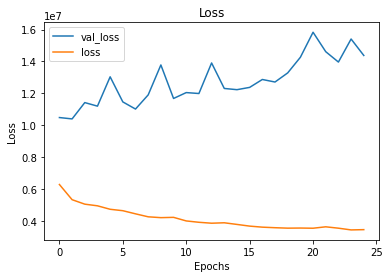

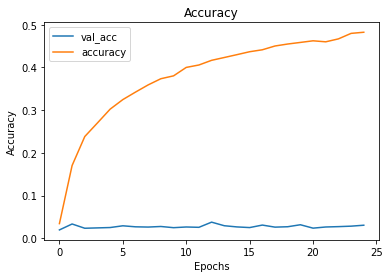

In [32]:
results=baseline.fit(X_train,y_train,epochs=25,batch_size=50,validation_data=(X_val,y_val))
visualize_training_results(results)

Severe overfitting, but also, this model has zero hidden layers.
Other things to keep in mind: normalize, and weights

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

X_train,X_val,y_train,y_val = train_test_split(X,y)
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_val_scale = ss.transform(X_val)


y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[   0    1    2 ... 1006 1007 1008], y=[485 309 202 ... 852 920 386] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 0.007324380327262795,
 1: 0.044371151440315844,
 2: 5.026617584595781,
 3: 1.5993783223713849,
 4: 0.17681569393050486,
 5: 3.5186323092170464,
 6: 5.026617584595781,
 7: 17.593161546085234,
 8: 35.18632309217047,
 9: 3.909591454685607,
 10: 3.909591454685607,
 11: 2.5133087922978903,
 12: 3.1987566447427698,
 13: 0.8796580773042616,
 14: 3.5186323092170464,
 15: 1.5298401344421941,
 16: 2.1991451932606543,
 17: 2.9321935910142054,
 18: 0.32579928789046725,
 19: 5.864387182028411,
 20: 5.026617584595781,
 21: 0.2792565324775434,
 22: 2.1991451932606543,
 23: 3.909591454685607,
 24: 5.026617584595781,
 25: 0.9259558708465913,
 26: 2.5133087922978903,
 27: 1.0053235169191561,
 28: 2.5133087922978903,
 29: 1.5298401344421941,
 30: 0.3449639518840242,
 31: 0.04312049398550302,
 32: 3.5186323092170464,
 33: 1.0053235169191561,
 34: 5.864387182028411,
 35: 0.8377695974326301,
 36: 4.3982903865213085,
 37: 0.9022134126197555,
 38: 11.728774364056822,
 39: 3.5186323092170464,
 40: 1.034891

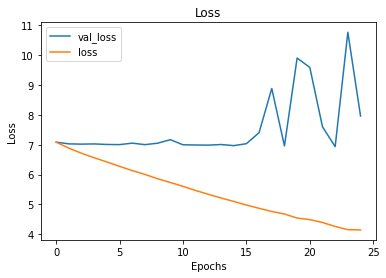

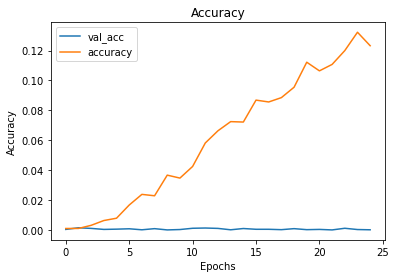

In [39]:
model = models.Sequential()
model.add(layers.Dense(2000,activation='relu',input_shape=(3000,)))
model.add(layers.Dense(1500,activation='relu'))
model.add(layers.Dense(1009,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

results=model.fit(X_train_scale,y_train,epochs=25,batch_size=500,validation_data=(X_val_scale,y_val),
                  class_weight = d_class_weights,verbose=False)
visualize_training_results(results)

35503/35503 [==============================] - 6s 162us/step
----------
Training Loss: 7.63 
Training Accuracy: 0.000479
11835/11835 [==============================] - 2s 153us/step
----------
Validation Loss: 7.63 
Validation Accuracy: 0.000338


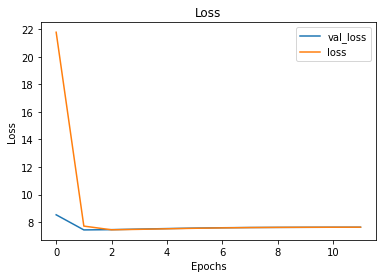

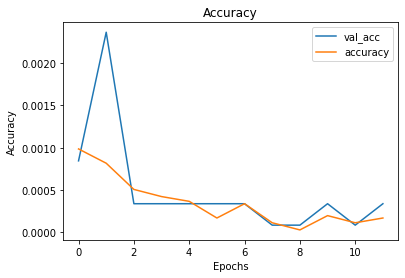

35503/35503 [==============================] - 7s 184us/step
----------
Training Loss: 7.0 
Training Accuracy: 0.12
11835/11835 [==============================] - 2s 177us/step
----------
Validation Loss: 8.11 
Validation Accuracy: 0.000253


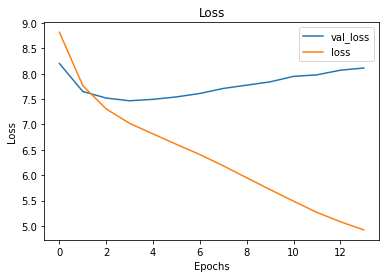

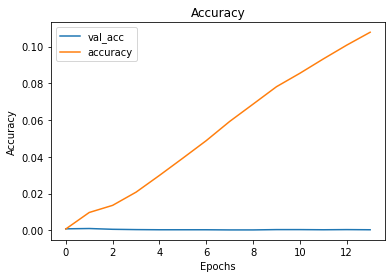

In [40]:
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint


L1_model = models.Sequential()
L1_model.add(layers.Dense(200,activation='relu',kernel_regularizer=regularizers.l1(0.005),input_shape=(3000,)))
L1_model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.005)))
L1_model.add(layers.Dense(1009,activation='softmax'))
L1_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


L1_results=L1_model.fit(X_train_scale,y_train,epochs=100,batch_size=500,validation_data=(X_val_scale,y_val),
                       callbacks=early_stopping,class_weight = d_class_weights,verbose=False)

results_train = L1_model.evaluate(X_train_scale,y_train)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
results_val = L1_model.evaluate(X_val_scale,y_val)
print('----------')
print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

visualize_training_results(L1_results)


L2_model = models.Sequential()
L2_model.add(layers.Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=(3000,)))
L2_model.add(layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
L2_model.add(layers.Dense(1009,activation='softmax'))
L2_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])



L2_results=L2_model.fit(X_train_scale,y_train,epochs=100,batch_size=500,validation_data=(X_val_scale,y_val),
                       callbacks=early_stopping,class_weight = d_class_weights,verbose=False)

results_train = L2_model.evaluate(X_train_scale,y_train)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
results_val = L2_model.evaluate(X_val_scale,y_val)
print('----------')
print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

visualize_training_results(L2_results)

In [ ]:
tanh_model = models.Sequential()
tanh_model.add(layers.Dense(1000,activation='tanh',kernel_regularizer=regularizers.l2(0.005),input_shape=(3000,)))
tanh_model.add(layers.Dense(1000,activation='tanh',kernel_regularizer=regularizers.l2(0.005)))
tanh_model.add(layers.Dense(1009,activation='softmax'))
tanh_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])



tanh_results=tanh_model.fit(X_train_scale,y_train,epochs=100,batch_size=500,validation_data=(X_val_scale,y_val),
                       callbacks=early_stopping,class_weight = d_class_weights,verbose=False)

print('Activation = tanh')
results_train = tanh_model.evaluate(X_train_scale,y_train)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
results_val = tanh_model.evaluate(X_val_scale,y_val)
print('----------')
print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

visualize_training_results(tanh_results)

more_layers = models.Sequential()
more_layers.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=(3000,)))
more_layers.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
more_layers.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
more_layers.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
more_layers.add(layers.Dense(1009,activation='softmax'))
more_layers.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])



ML_results=more_layers.fit(X_train_scale,y_train,epochs=100,batch_size=500,validation_data=(X_val_scale,y_val),
                       callbacks=early_stopping,class_weight = d_class_weights,verbose=False)

print('More Dense Layers')
results_train = more_layers.evaluate(X_train_scale,y_train)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
results_val = more_layers.evaluate(X_val_scale,y_val)
print('----------')
print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

visualize_training_results(ML_results)

do_model = models.Sequential()
do_model.add(layers.Dropout(0.3),input_shape=(3000,))
do_model.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
do_model.add(layers.Dropout(0.3))
do_model.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
do_model.add(layers.Dropout(0.3))
do_model.add(layers.Dense(1009,activation='softmax'))
do_model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])



do_results=do_model.fit(X_train_scale,y_train,epochs=100,batch_size=500,validation_data=(X_val_scale,y_val),
                       callbacks=early_stopping,class_weight = d_class_weights,verbose=False)

print('With Dropout Layers')
results_train = do_model.evaluate(X_train_scale,y_train)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
results_val = do_model.evaluate(X_val_scale,y_val)
print('----------')
print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

visualize_training_results(do_results)